In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from lbow.oneDimensional.steadystate import HalfPlaneModel

In [3]:
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize']  = 16
mpl.rcParams['axes.titlesize']  = 16

# Produce figure 6

Copyright 2023 Dries Allaerts

Licensed under the Apache License, Version 2.0.

## Input parameters

In [6]:
# Input data
N = 0.01   # Brunt-Vaisala frequency[1/s]
L = 1000   # Hill half width [m]

U0 = 0.5   # Wind speed [m/s]
U1 = 5     # Wind speed [m/s]
U2 = 15    # Wind speed [m/s]

## Define some functions

In [4]:
def create_model(U,N,L,verbose=0):    
    # Hill shape
    hmax = 0.1*L                     # Height of the hill [m]
    h = lambda x: hmax/(1+(x/L)**2)  # Shape function of the hill
    
    # Numerical parameters
    Lx = 2000 * L                    # Length of the numerical domain [m]
    Nx = 2*int(1e4)                  # Number of grid points
    
    # Numerical grid
    xs,dx = np.linspace(-Lx/2,Lx/2,Nx,endpoint=False,retstep=True)
    if verbose>0: print('Horizontal grid resolution is {} m'.format(dx))
    
    return xs,HalfPlaneModel(xs,h(xs),U,N)

In [5]:
def autocorrelation_fft(fc):
    S = fc*np.conj(fc)
    R = np.fft.irfft(S,norm='forward')
    return R[:fc.size-1]/R[0]

## Models

In [7]:
xs,model0 = create_model(U0,N,L)
_,model1 = create_model(U1,N,L)
_,model2 = create_model(U2,N,L)

In [8]:
z = 1500
w0 = model0.solve('w',z,space='fourier')
w1 = model1.solve('w',z,space='fourier')
w2 = model2.solve('w',z,space='fourier')
print('Case 0: z = {} corresponds to zN/U = {:.2f}'.format(1500,1500/(2*np.pi*U0/N)))
print('Case 1: z = {} corresponds to zN/U = {:.2f}'.format(1500,1500/(2*np.pi*U1/N)))
print('Case 2: z = {} corresponds to zN/U = {:.2f}'.format(1500,1500/(2*np.pi*U2/N)))

Case 0: z = 1500 corresponds to zN/U = 4.77
Case 1: z = 1500 corresponds to zN/U = 0.48
Case 2: z = 1500 corresponds to zN/U = 0.16


# Figure 6

Minimum of autocorrelation function for Fr->0 is 2.0028018018018017
Minimum of autocorrelation function for case 0 is 2.0
Minimum of autocorrelation function for case 1 is 2.3


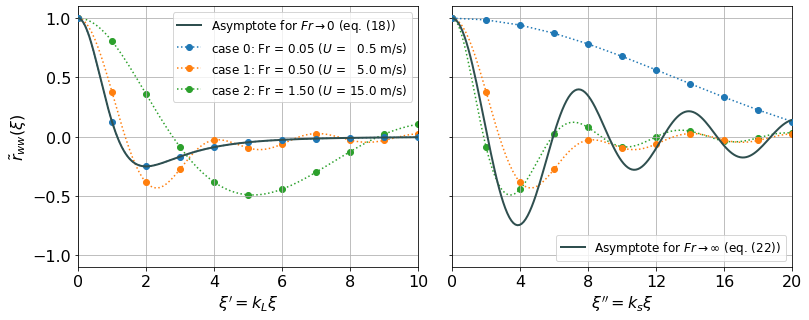

In [9]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(12.8,4.8))

fig.subplots_adjust(wspace=0.1)

# Autocorrelation in the limit of Fr=0, y=x/L
y = np.linspace(0.001,10,1000)
f = (1-0.75*y**2)/(1+0.25*y**2)**3
label = 'Asymptote for ' +r'$\mathit{Fr}\rightarrow 0$' + ' (eq. (18))'
ax[0].plot(y,f,zorder=4,lw=2,color='darkslategrey',label=label)
_ = ax[0].set(xlim=[0,10],ylim=[-1.1,1.1],xlabel=r'$\xi^\prime=k_L\xi$',ylabel=r'$\tilde{r}_{ww}(\xi)$')
ax[0].grid('on')

ax[0].plot(xs[xs>=0]/L,autocorrelation_fft(w0),':o',markevery=10,zorder=3,
          label='case 0: Fr = {:>4.2f}'.format(U0/N/L)+' ($U$ =  {:>4.1f} m/s)'.format(U0))
ax[0].plot(xs[xs>=0]/L,autocorrelation_fft(w1),':o',markevery=10,zorder=2,
          label='case 1: Fr = {:>4.2f}'.format(U1/N/L)+' ($U$ =  {:>4.1f} m/s)'.format(U1))
ax[0].plot(xs[xs>=0]/L,autocorrelation_fft(w2),':o',markevery=10,zorder=1,
          label='case 2: Fr = {:>4.2f}'.format(U2/N/L)+' ($U$ = {:>4.1f} m/s)'.format(U2))

idx_th = np.argmin(f)
idx0 = np.argmin(autocorrelation_fft(w0))
idx1 = np.argmin(autocorrelation_fft(w1))
print('Minimum of autocorrelation function for Fr->0 is {}'.format(y[idx_th]))
print('Minimum of autocorrelation function for case 0 is {}'.format(xs[xs>=0][idx0]/L))
print('Minimum of autocorrelation function for case 1 is {}'.format(xs[xs>=0][idx1]/L))


ax[0].legend(fontsize=12)

# Autocorrelation in the limit of Fr=Inf, y=k_cx
y = np.linspace(0.001,120,1000)
f = 3*(np.sin(y)*(y**2-2)+2*y*np.cos(y))/y**3
label = 'Asymptote for ' +r'$\mathit{Fr}\rightarrow \infty$' + ' (eq. (22))'
ax[1].plot(y,f,zorder=4,lw=2,color='darkslategrey',label=label)
_ = ax[1].set(xlim=[0,20],ylim=[-1.1,1.1],xticks=[0,4,8,12,16,20],xlabel=r'$\xi^{\prime\prime}=k_s\xi$')
ax[1].grid('on')

ax[1].plot(xs[xs>=0]*N/U0,autocorrelation_fft(w0),':o',markevery=1,zorder=3)
ax[1].plot(xs[xs>=0]*N/U1,autocorrelation_fft(w1),':o',markevery=10,zorder=2)
ax[1].plot(xs[xs>=0]*N/U2,autocorrelation_fft(w2),':o',markevery=30,zorder=1)

ax[1].legend(fontsize=12,loc='lower right')

plt.savefig(os.path.join('Figures','autocorrelation_split.png'),bbox_inches='tight')
plt.savefig(os.path.join('Figures','autocorrelation_split.pdf'),bbox_inches='tight')